## Compare ideal nonuniformity
nonuniformity may vary according to particle energy and type, we will investigate these effects here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.interpolate import LinearNDInterpolator
import os
TAO_CALIB_PATH="/dybfs/users/xuhangkun/SimTAO/offline"
Nonuniformity_Path=os.path.join(TAO_CALIB_PATH,"Nonuniformity")
from utils.eval_map import diff_mean,diff_rms

In [8]:
def MeanMap(map_list,radius_cut=650):
    """Calculate the mean of the map

    Args:
        map_list : list of nonuniformity map
    Return:
        mean_map : mean of nonuniformity map in map_list
    """
    xx = np.linspace(0,radius_cut,30)
    yy = np.linspace(1,179,30)
    info = {"x":[],"y":[],"ratio":[]}
    for r in xx:
        for theta in yy:
            ratios = [map(r,theta) for map in map_list]
            ratio = sum(ratios)/len(ratios)
            info["x"].append(r)
            info["y"].append(theta)
            info["ratio"].append(ratio)
    func = LinearNDInterpolator(list(zip(info["x"],info["y"])),info["ratio"])
    return func

def DiffMap(map_1,map_2,radius_cut=650):
    """Calculate the difference betweeb maps

    Args:
        map_1 : first nonuniformity map
        map_2 : second nonuniformity map
    Return:
        diff_map : different of map
    """
    xx = np.linspace(0,radius_cut,50)
    yy = np.linspace(1,179,50)
    info = {"x":[],"y":[],"ratio":[]}
    abs_ratio = []
    for r in xx:
        for theta in yy:
            ratio = map_1(r,theta) - map_2(r,theta)
            info["x"].append(r)
            info["y"].append(theta)
            info["ratio"].append(ratio)
            abs_ratio.append(abs(ratio))
    print("Abs min : %.5f ; Abs max : %.5f "%(min(abs_ratio),max(abs_ratio)))
    func = LinearNDInterpolator(list(zip(info["x"],info["y"])),info["ratio"])
    return func

def save_fig(func,ralative_path,title="map",radius_cut=650):
    """save fig
    """
    xx = np.linspace(0,radius_cut,50)
    yy = np.linspace(1,179,50)
    xx,yy = np.meshgrid(xx,yy)
    zz = func(xx,yy)
    fig = plt.figure()
    plt.pcolormesh(xx*xx*xx,np.cos(yy*np.pi/180),zz, shading='auto')
    plt.colorbar()
    plt.xlabel("$R^{3} [mm^{3}]$",fontsize=14)
    plt.ylabel("$cos(\\theta)$",fontsize=14)
    plt.title(title,fontsize=16)
    plt.savefig(os.path.join(Nonuniformity_Path,ralative_path))

def save_up_down_fig(func,ralative_path,title="map",radius_cut=650):
    """save fig
    """
    xx = np.linspace(0,radius_cut,50)
    yy = np.linspace(1,89,50)
    xx,yy = np.meshgrid(xx,yy)
    zz = func(xx,yy) - func(xx,180-yy)
    fig = plt.figure()
    plt.pcolormesh(xx*xx*xx,np.cos(yy*np.pi/180),zz, shading='auto')
    plt.colorbar()
    plt.xlabel("$R^{3} [mm^{3}]$",fontsize=14)
    plt.ylabel("$cos(\\theta)$",fontsize=14)
    plt.title(title,fontsize=16)
    plt.savefig(os.path.join(Nonuniformity_Path,ralative_path))

In [ ]:
# load all map
sources = ["gamma","electron","positron"]
labels = ["\\gamma","e^{-}","e^{+}"]
all_maps = []
mean_maps = []
energy = [1,4,8]
for source in sources:
    files = [os.path.join(Nonuniformity_Path,"data/map/","ideal_nonuniformity_%s_%sMeV.pkl"%(source,e)) for e in energy]
    maps = [pkl.load(open(file,"rb")) for file in files]
    all_maps.append(maps)
    mean_maps.append(MeanMap(maps))

## Effect of particle energy
we will investigate the effect of energy 

Abs min : 0.00000 ; Abs max : 0.00575 
Abs min : 0.00000 ; Abs max : 0.00291 
Abs min : 0.00000 ; Abs max : 0.00481 


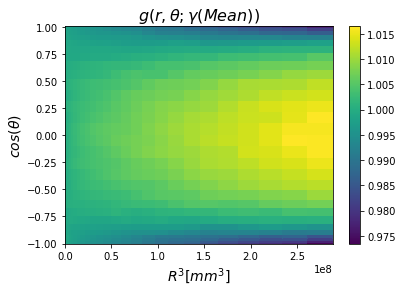

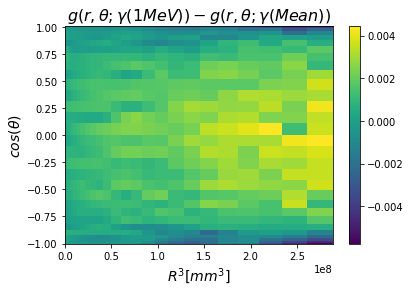

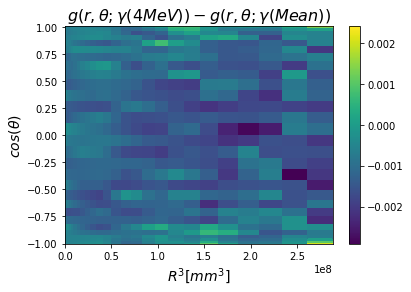

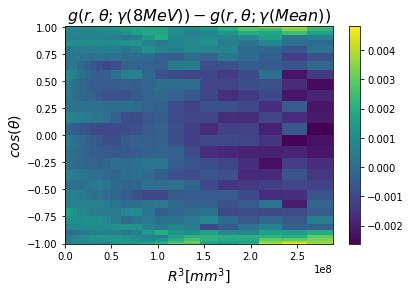

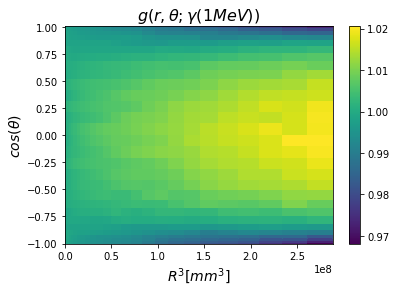

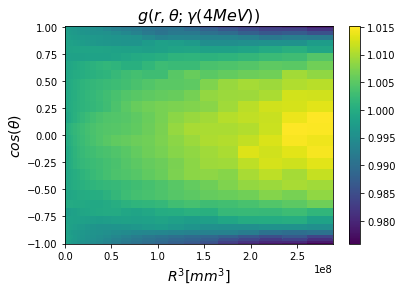

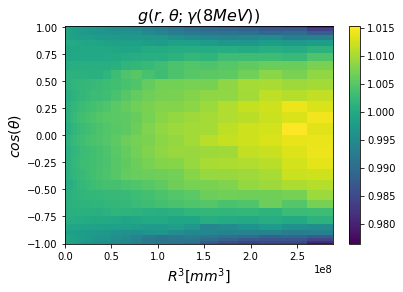

In [16]:
source = "gamma"
label = "\\gamma"
energy = [1,4,8]
files = [os.path.join(Nonuniformity_Path,"data/map/","ideal_nonuniformity_%s_%sMeV.pkl"%(source,e)) for e in energy]
maps = [pkl.load(open(file,"rb")) for file in files]
mean_map = MeanMap(maps)
diff_maps = [DiffMap(e_m,mean_map) for e_m in maps]
save_fig(mean_map,
        ralative_path="data/paper_fig/compare_ideal_nonuniformity/ideal_mean_%s_nonuniformity.pdf"%(source),
        title="$g(r,\\theta;%s(Mean)$)"%(label)
        )
# save the difference 
for diff,e in zip(diff_maps,energy):
    save_fig(diff,
          ralative_path="data/paper_fig/compare_ideal_nonuniformity/diff_ideal_%s_%sMeV-mean.pdf"%(source,e),
          title="$g(r,\\theta;%s(%dMeV))- g(r,\\theta;%s(Mean))$"%(label,e,label)
          )
# save the map 
for map,e in zip(maps,energy):
    save_fig(map,
          ralative_path="data/paper_fig/compare_ideal_nonuniformity/ideal_%s_%sMeV_nonuniformity.pdf"%(source,e),
          title="$g(r,\\theta;%s(%dMeV))$"%(label,e)
          )

## Effect of particle type


Abs min : 0.00303 ; Abs max : 0.01187 
Abs min : 0.00163 ; Abs max : 0.00600 
Abs min : 0.00075 ; Abs max : 0.00545 


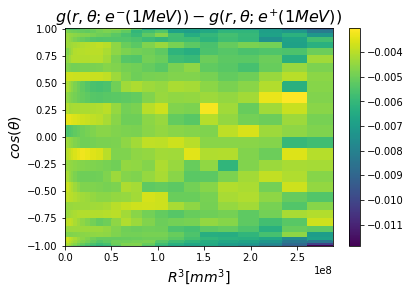

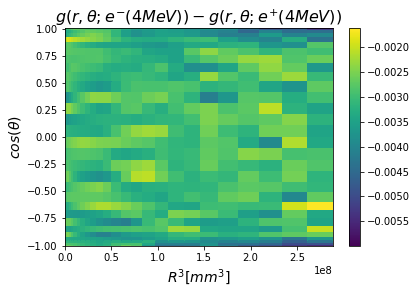

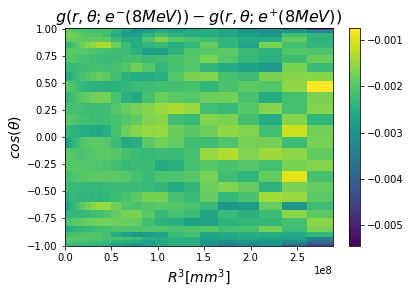

In [22]:
energy = [1,4,8]
particles = ["electron","positron"]
labels = ["e^{-}","e^{+}"]
files = [os.path.join(Nonuniformity_Path,"data/map/","ideal_nonuniformity_%s_%sMeV.pkl"%(particles[0],e)) for e in energy]
electron_maps = [pkl.load(open(file,"rb")) for file in files]
files = [os.path.join(Nonuniformity_Path,"data/map/","ideal_nonuniformity_%s_%sMeV.pkl"%(particles[1],e)) for e in energy]
gamma_maps = [pkl.load(open(file,"rb")) for file in files]
diff_maps = [DiffMap(e_m,g_m) for e_m,g_m in zip(electron_maps,gamma_maps)]
# save the difference 
for diff,e in zip(diff_maps,energy):
    save_fig(diff,
          ralative_path="data/paper_fig/compare_ideal_nonuniformity/diff_ideal_electron-gamma_%sMeV.pdf"%(e),
          title="$g(r,\\theta;%s(%dMeV))- g(r,\\theta;%s(%dMeV))$"%(labels[0],e,labels[1],e)
          )

Abs min : 0.00001 ; Abs max : 0.01628 
Abs min : 0.00268 ; Abs max : 0.00732 


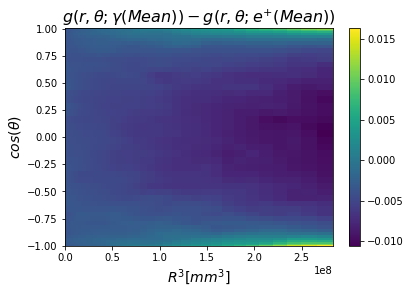

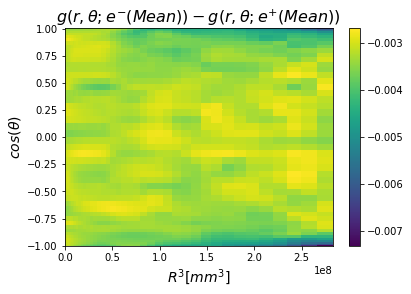

In [12]:
gamma_positron_diff = DiffMap(mean_maps[0],mean_maps[2])
save_fig(gamma_positron_diff,
          ralative_path="data/paper_fig/compare_ideal_nonuniformity/diff_ideal_gamma-positron_Mean.pdf",
          title="$g(r,\\theta;%s(Mean))- g(r,\\theta;%s(Mean))$"%(labels[0],labels[2])
          )
electron_positron_diff = DiffMap(mean_maps[1],mean_maps[2])
save_fig(electron_positron_diff,
          ralative_path="data/paper_fig/compare_ideal_nonuniformity/diff_ideal_electron-positron_Mean.pdf",
          title="$g(r,\\theta;%s(Mean))- g(r,\\theta;%s(Mean))$"%(labels[1],labels[2])
          )

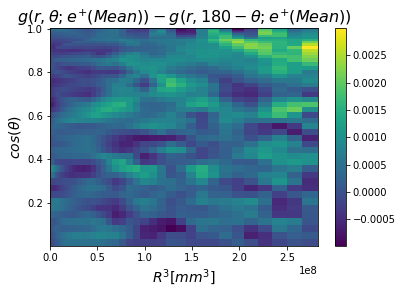

In [15]:
save_up_down_fig(
    all_maps[2][1],
    ralative_path="data/paper_fig/compare_ideal_nonuniformity/diff_positron_Mean_unsymmetry.pdf",
    title="$g(r,\\theta;%s(Mean))- g(r,180-\\theta;%s(Mean))$"%(labels[2],labels[2])
)